<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Travaux Dirigés - Econométrie en finance - séance 4 - corrigé</font></center></b>
    

    
<g><h7><center> CM - P. Durand  - pierre.durand@u-pec.fr </center></h7></g>

<g><h7><center> TD - R. Birem  - abderRaouf.birem@u-pec.fr </center></h7></g>


<b><center><font size="5">M1 - 2024-2025</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


<b>Objectifs de la séance : </b>

- Commentaire de code
- Application économétrique
- Exercices types CC



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">


<b>Exercice 1 : commenter des codes</b>
    
- Commentez les différentes cellules de code suivant : 
    - que vont-ils produire ? 
    - quelles variables sont-elles créées ?
    - des erreurs sont-elles inscrites ? 
    - ...


</span>

In [4]:
# 1
import pandas as pd

In [5]:
# 2
path = "C:/Users/Pierre/Desktop/cours/creteil/2021_2022/econometrie_banque_finance_m1s1/td/data/"

In [6]:
# 3
a = 1 #Declaration d'une variable num
print(a)

1


In [7]:
# 4
# nous supposons que df est un dataframe
df.head()

NameError: name 'df' is not defined

In [8]:
# 5
une_liste = [1,2,3,4]

for i in une_liste :
    print(i + 5)

6
7
8
9


In [9]:
# 6
for i in une_liste :
    if i > 2 :
        print(i)

3
4


In [10]:
# 7
# df est un dataframe avec 3 variable : "date", "X1" et "X2"
df["X1_gr"] = 100 * ( df["X1"]/df["X1"].shift(1) - 1 )

NameError: name 'df' is not defined

In [11]:
# 8
# df est un dataframe avec 3 variable : "date", "X1" et "X2"
df.plot(x = "date",y="X2", title="X2", legend=True)

NameError: name 'df' is not defined

In [12]:
# 9
import statsmodels.api as sm


X = df["X1"].dropna()


y = df["X2"].dropna()

modele = sm.OLS(y,X)

resultats = modele.fit()

print(resultats.summary())

NameError: name 'df' is not defined

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

L'idée ici est de décrire les codes sans trop s'éparpiller mais sans rien oublier (variables, type, output, erreurs etc...)

Commentaires : 
1 - Nous importons le package pandas sous le nom "pd". Cette librairie sert à la manipulation de données sous python.
    
2 - Nous créons une variable de type chaine de caractères. La variable s'appelle path et contient un chemin d'accès vers un dossier.
    
3 - Nous créons une variable de type integer appelée a et elle contient l'entier 1. Nous utilisons ensuite la fonction préintégrée de python permettant de l'afficher. L'output de cette cellule de code sera donc d'imprimer 1
    
4 - La fonction .head() de pandas, appliquée à un dataframe permet d'afficher l'en-tête du dataframe (les 5 premières lignes).
    
5 - Nous créons une variable appelée une_liste et contenant une liste de 4 integer. Puis nous utilisons une boucle for permettant d'afficher les éléments de cette liste +5 (6, 7, 8, 9) un à un. 
    
6 - Cette boucle semble permettre d'afficher les élements de la liste une_liste qui sont supérieurs à 2 strictement. Cela étant, il manque les ":" après l'instruction if. Un message d'erreur va donc apparaître.
    
7 - Cette cellule permet de créer une nouvelle variable dans le dataframe df. Cette variable est égale au taux de croissance de X1. La fonction .shift(1) de pandas permet de décaler d'une ligne (donc d'une période) les éléments de df["X1"].
    
8 - Cette cellule de code permet d'afficher le graphique ligne de X2 en ordonnée en fonction des dates en abscisses. Le graphique aura un titre "X2" et affichera une légende.
    
9 - Dans cette cellule, le package statsmodels.api est importé. C'est le package que nous utilisons pour mener des estimations et tests économétriques. Nous créons ensuite une matrice X (contenant la variable X1) et une autre matrice y (contenant la variable X2). Nous définissons ensuite un modèle MCO (X2 = \beta X1 + \epsilon). On remarque que la constante a été oubliée. Nous estimons ensuite le modèle par les MCO et stockons les résultats dans une variable appelée resultats. Enfin, nous utilisons la fonction print pour afficher un résumé des résultats d'estimation MCO. 


</span>

<hr style=" border: .5px solid black;">
<br>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


Nous reprenons dans ce TD les données utilisées la séance dernière, portant sur le CAPM. Pour rappelle, nous cherchions à estimer la dépendance entre l'actif de l'entreprise Ford et la rentabilité du marché. Avec un coefficient associé au rendement du marché significatif, nous avions néanmoins un modèle relativement peu performant (exlicatif de moins de 30\% des variations du titre de Ford). Nous allons essayé d'améliorer ce modèle en introduisant de nouvelle variables explicatives : 
    
- le cours du prix du pétrole : matière première influante de bon nombre de titre, beaucoup d'études tentent de capter les effets de la variation des prix du pétrole sur la volatilité des marché boursier. Dans la mesure où Ford est une entreprise automobile, nous avons d'autant plus de raisons de penser que les prix du pétrole auront un rôle à jouer ici.
- nous introduirons également des dummy temporelles afin de capter les effets de perturbations macroéconomiques. 

<br>

Le modèle initial est donné par : 

$$E(R_i) - r =  \alpha + \beta_1 \times (E(R_m) - r) + \epsilon$$
    
<br>
    
Nous allons donc estimer les modèles suivant : 
    
$$E(R_i) - r =  \alpha + \beta_1 \times (E(R_m) - r) + \beta_2 \times (E(R_{oil} - r) + \epsilon$$
    
et 
    
$$E(R_i) - r =  \alpha + \beta_1 \times (E(R_m) - r) + \beta_2 \times R_{oil} + \beta_3 D_{crise} + \beta_4 D_{covid} + \epsilon$$

<br>
    
où $E(R_i)$ renvoie à la rentabilité espérée pour l'actif $i$, $E(R_m)$ est la rentabilité espérée du marché, r désigne le taux d'intérêt sans risque (généralement approximé par le taux d'intérêt directeur), $E(R_{oil}$ renvoie aux rendements des prix du pétrole, $D_{crise}$ est une dummy valant $1$ au moment de la crise et $0$ sinon, D_{covid} est une dummy pour la crise sanitaire, $\alpha$ et $\beta$ sont les coefficients à estimer et $\epsilon$ désigne le terme d'erreur. 



<br>

<hr style=" border: .5px solid black;">

1. Importez la base de données "capm2.txt".


_Note_ :
- attention de bien connaître l'emplacement où vous mettez la base sur votre ordinateur
- remplacer les "\" par des "/" dans le chemin d'accès
- ajouter un "/" à la fin du chemin
- utiliser le package `pandas` (sous le nom `pd`)
- le fichier est au format texte `.txt` (équivalent de csv) : utilisez la fonction `.read_csv()` en spécifiant le séparateur (`sep = ";"`)

</span> 

In [ ]:
import pandas as pd

In [41]:
chemin = "C:\\Users\\issak\\Documents\\M1\\Econométrie en Banque-Finance\\data_2\\"

df = pd.read_csv(chemin + "capm2.txt", sep=";")

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<hr style=" border: .5px solid black;">

2. Vérifiez que la base de données à bien été importée en affichant l'entête du dataframe

_Note_ : fonction `.head()`

</span> 

In [42]:
df.head()

,date,ford,sandp,ustb3m,oil
0,2001-01-01,15.454666,1366.010010,4.84,28.700001
1,2001-02-01,15.411097,1239.939941,4.72,27.420000
2,2001-03-01,15.582887,1160.329956,4.18,26.400000
3,2001-04-01,16.336536,1249.459961,3.83,26.400000
4,2001-05-01,13.631827,1255.819946,3.54,28.370001


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


La base de données contient 5 variables à fréquence mensuelle, de janvier 2001 à mai 2021 (245 observations) :
- `date` qui contient les dates
- `ford` qui contient l'indice des prix de l'actif de l'entreprise Ford
- `sandp` qui contient l'indice des prix du marché (indice S&P 500)
- `ustb3m` qui contient l'indice des bons du trésor américain à 3 mois (proxy pour le taux d'intérêt sans risque)
- `oil` contient l'indice des prix du pétrole 

<hr style=" border: .5px solid black;">

3. Calculer les différentes variables suivantes :
    - $rsandp_t = 100 \times (sandp_t / sandp_{t-1} - 1)$
    - $rford_t = 100 \times (ford_t / ford_{t-1} - 1)$
    - $roil = 100 \times (oil_t / oil_{t-1} - 1)$
    - $ersandp = rsandp - ustb3m$
    - $erford = rford - ustb3m$



Affichez l'entête du dataframe pour vérifier que les variables ont bien été créées. Donnez une interprétation économique de ces variables. 

<br>

_Note_ : 
- pour rappel, créer une nouvelle variable dans un dataframe à partir d'une variable déjà contenue par ce dataframe se fait comme suit (par exemple la différence entre deux var `X_1` et `X_2`),

`df[ " nom_de_la_nouvelle_var " ] = df[ " X_1 " ] - df[ " X_2 " ]`

- pour avoir une variable décalée d'une période (en `t-1`, on utilise la fonction `.shft(-1)`) :

`df[ "X" ].shift(1)`


</span> 

In [43]:
df["rsandp"] = 100 * ( df["sandp"]/df["sandp"].shift(1) - 1 )
df["rford"] = 100 * ( df["ford"]/df["ford"].shift(1) - 1 )


df["roil"] = 100 * ( df["oil"]/df["oil"].shift(1) - 1 )


df["ersandp"] = df["rsandp"] - df["ustb3m"]
df["erford"] = df["rford"] - df["ustb3m"]

In [44]:
df.head()

,date,ford,sandp,ustb3m,oil,rsandp,rford,roil,ersandp,erford
0,2001-01-01,15.454666,1366.010010,4.84,28.700001,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,15.411097,1239.939941,4.72,27.420000,-9.229074,-0.281915,-4.459934,-13.949074,-5.001915
2,2001-03-01,15.582887,1160.329956,4.18,26.400000,-6.420471,1.114716,-3.719912,-10.600471,-3.065284
3,2001-04-01,16.336536,1249.459961,3.83,26.400000,7.681436,4.836389,0.000000,3.851436,1.006389
4,2001-05-01,13.631827,1255.819946,3.54,28.370001,0.509019,-16.556196,7.462125,-3.030981,-20.096196


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>



Interprétation des variables crées : voir séance 2, nous avons créé les taux de croissance (rendements) et purgé du taux sans risque. 




</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

4. Exécutez la cellule suivante, puis affichez l'entête du dataframe. Commentez.




</span> 

In [45]:
l_crisis = []
date_crisis = ["2007-07-01","2007-08-01","2007-09-01","2007-10-01","2007-11-01","2007-12-01"]
for i in df.date : 
    if i in date_crisis :
        l_crisis.append(1)
    else : 
        l_crisis.append(0)

        
        
l_covid = []
date_covid = ["2020-01-01","2020-02-01","2020-03-01","2020-04-01","2020-05-01","2020-06-01"]
for i in df.date : 
    if i in date_covid :
        l_covid.append(1)
    else : 
        l_covid.append(0) 
        
df["d_crisis"] = l_crisis
df["d_covid"] = l_covid

In [46]:
df.head()

,date,ford,sandp,ustb3m,oil,rsandp,rford,roil,ersandp,erford,d_crisis,d_covid
0,2001-01-01,15.454666,1366.010010,4.84,28.700001,NaN,NaN,NaN,NaN,NaN,0,0
1,2001-02-01,15.411097,1239.939941,4.72,27.420000,-9.229074,-0.281915,-4.459934,-13.949074,-5.001915,0,0
2,2001-03-01,15.582887,1160.329956,4.18,26.400000,-6.420471,1.114716,-3.719912,-10.600471,-3.065284,0,0
3,2001-04-01,16.336536,1249.459961,3.83,26.400000,7.681436,4.836389,0.000000,3.851436,1.006389,0,0
4,2001-05-01,13.631827,1255.819946,3.54,28.370001,0.509019,-16.556196,7.462125,-3.030981,-20.096196,0,0


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Nous remarquons que deux colonnes ont été créées : 
    
- `d_crisis` qui contient une variable indicatrice pour la crise (de juillet 2007 à janvier 2008). Elle vaut donc 0 à toutes les périodes sauf pendant la crise.
- `d_covid`, également une dummy : elle vaut 0 pour toutes les périodes sauf pour le début de la pandémie (de janvier à juin 2020).
    
On pourra remarquer que le choix des dates est plus ou moins "arbitraire". On essaye de se caler sur un moment où le marché à été impacté de façon importante. 
    
    
    
<hr style=" border: .5px solid black;">

5. Nous avons déjà étudier un certain nombre de statistiques descriptives à la séance précédente. Nous complétons cette analyse en étudiant les graphiques associés à la variable `oil`: 
- Faites un graphique ligne de la variable `oil` (en niveau et en taux de croissance).
- Faites un graphique en nuage de points entre `oil` et la variable expliquée (en rendement)

</span> 

<Axes: title={'center': 'Evolution du prix du pétrole'}, xlabel='date'>

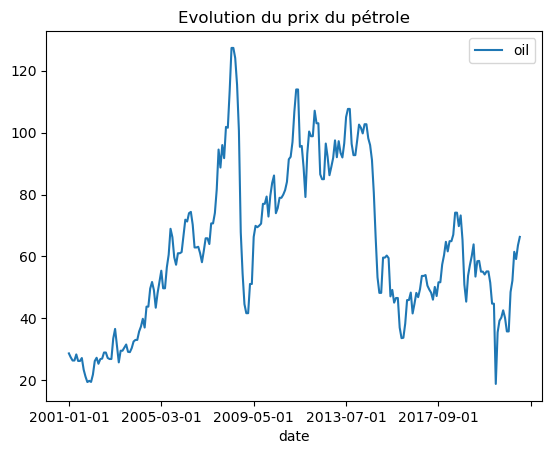

In [47]:
# en niveau
# ustb3m avec les options
df.plot(x = "date",y="oil", title="Evolution du prix du pétrole", legend=True)

<Axes: title={'center': 'Evolution du rendement du pétrole'}, xlabel='date'>

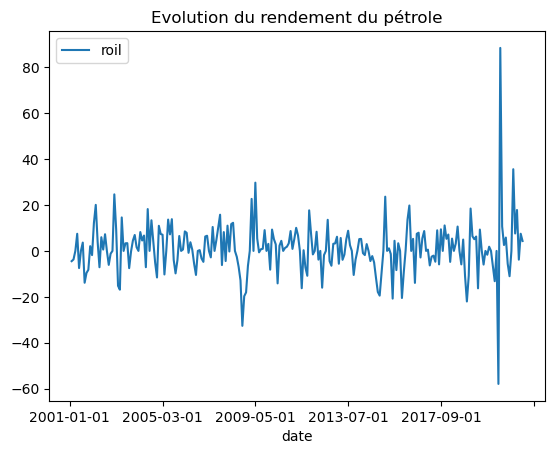

In [48]:
# en niveau
# ustb3m avec les options
df.plot(x = "date",y="roil", title="Evolution du rendement du pétrole", legend=True)

<Axes: title={'center': 'erford en fonction de eroil'}, xlabel='roil', ylabel='erford'>

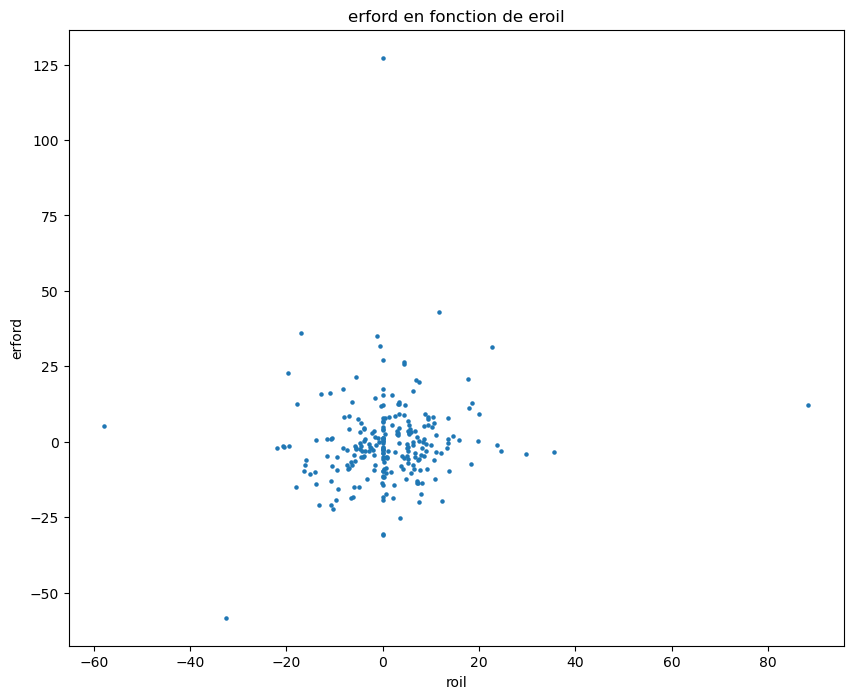

In [49]:
# Nuage de points avec options 
df.plot.scatter(x="roil",y="erford", title="erford en fonction de eroil", s=5, figsize=(10,8))
#OUTLIER

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires :
- on remarque que les prix du pétrole ont fortement variés sur la période.

<br>

- on peut remarquer la présence des crises (fin des années 2000 et covid) sont très visibles. Les variations du pétrole sont particulièrement touchées par la crise du covid (même si 

<br>

- il n'y a pas de relation visible directe entre les rendements sur le marché du pétrole et le rendement de l'actif de Ford. Déjà, ce graphique peut laisser présager d'une faible dépendance de la variable expliquée au pétrole. 

</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

5. Affichez la matrice des coefficients de corrélation entre les variables. N'incluez dans cette matrice, que la liste des variables du modèle. Commentez.
    




</span> 

In [50]:
# rford simple
df[["erford","ersandp","roil","d_crisis","d_covid"]].corr()

,erford,ersandp,roil,d_crisis,d_covid
erford,1.000000,0.548571,0.132862,-0.093048,-0.059061
ersandp,0.548571,1.000000,0.195503,-0.114105,-0.004164
roil,0.132862,0.195503,1.000000,0.063149,0.036325
d_crisis,-0.093048,-0.114105,0.063149,1.000000,-0.025105
d_covid,-0.059061,-0.004164,0.036325,-0.025105,1.000000


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires :
- On regarde d'une part les corrélations linéaires entre les variables explicatives et la variable expliquée.
    - positif et fort pour le rendement espéré de SP500
    - positif mais plus faible pour le pétrole (consistent avec le commentaire sur le nuage de points)
    - négatif pour les deux dummy : normalement, on évite de regarder une corrélation linéaire entre une dummy et une variable mais là, nous pouvons voir qu'il semblerait y avoir une relation négative ce qui n'est pas inintéressant : pendant les périodes de crise et de covid, l'indice de ford semble avoir eu des taux de croissance négatifs. 
    
- On peut ensuite regarder les coefficients entre les variables explicatives : l'idée ici est de se faire une idée quant à la potentielle présence de multicolinéarité. S'il en est, elle devrait être entre le rendement du SP500 et celui du prix du pétrole. 

</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

6. Pour savoir si l'introduction de nouvelles variables dans le modèle l'a amélioré, il nous faut les résultats du modèle sans ces nouvelles variables. Estimez le modèle initial : 
    
    
$$E(R_i) - r =  \alpha + \beta_1 \times (E(R_m) - r) + \epsilon$$
    
    
Dans la mesure où nous avions repéré la semaine dernière, la présence d'hétéroscédasticité et d'autocorrélation, nous procèderons directement à une estimation corrigée pour ces deux problèmes. 

_Note_:
    
- importez le package adéquat
- n'oubliez pas d'ajouter une constante dans le modèle
- utilisez la fonction suivante pour obtenir les résultats robustes aux problèmes identifiés : `.get_robustcov_results(cov_type='HAC', maxlags=10)`
    
</span> 

In [51]:
import statsmodels.api as sm

In [52]:
X = df["ersandp"].dropna()
X = sm.add_constant(X)

y = df["erford"].dropna()

modele = sm.OLS(y,X)

resultats = modele.fit()

print(resultats.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.2
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.42e-20
Time:                        00:25:10   Log-Likelihood:                -951.59
No. Observations:                 244   AIC:                             1907.
Df Residuals:                     242   BIC:                             1914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7841      0.778      1.008      0.3

In [53]:
resultat_robust = resultats.get_robustcov_results(cov_type='HAC', maxlags=10)
print(resultat_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     48.72
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.82e-11
Time:                        00:25:11   Log-Likelihood:                -951.59
No. Observations:                 244   AIC:                             1907.
Df Residuals:                     242   BIC:                             1914.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7841      0.897      0.874      0.3

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires :
- on remarque que l'option "HAC" permet de mener une correction de la matrice de variance-covariance de l'erreur à la Newey-West
- cette correction semble avoir modifié les écarts-types des estimateurs (à la hausse ce qui est normal puisque l'hétéroscédasticité et l'autocorrélation ont tendance à mener à sous-estimer la variance des estimateurs). 
- on pourra rappeler que ces deux problèmes sont un soucis dans la mesure où ils entrainent un estimateur erroné de la matrice de variance-covariance des erreurs, ce qui fausse l'inférence statistique (c a d les tests de significativité). 
</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

7. Estimez désormais le modèle étdendu (avec toutes les variables explicatives). Comparez les modèles. 



</span> 

In [54]:
X = df[["ersandp","roil","d_crisis","d_covid"]].dropna()
X = sm.add_constant(X)

y = df["erford"].dropna()

modele2 = sm.OLS(y,X)

resultats2 = modele2.fit()

print(resultats2.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     26.37
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.03e-18
Time:                        00:25:11   Log-Likelihood:                -950.67
No. Observations:                 244   AIC:                             1911.
Df Residuals:                     239   BIC:                             1929.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9343      0.801      1.167      0.2

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires : 
- Sur le modèle seul : 
    - on remarque que seul la variable associée au rendement du marché est significative (ce à quoi on pouvait s'attendre pour `oil` toujours en nous basant sur le nuage de point). L'absence d'effet pour les crise est plus étonnant.
    - le modèle est globalement significatif
- En comparant avec le premier modèle :
    - $R^2$ du même ordre. Pour comparer on regarde le coefficient de détermination ajusté (on peut d'ailleurs remarquer que l'introduction de nouvelles variables dans le modèle a naturellement fait grimper le $R^2$ non ajusté).
    - les critères d'information AIC et BIC suggèrent aussi que le premier modèle est le meilleur (même s'ils sont très proche).
    
- Ainsi, si aucun coefficient aujouté n'est significatif et que le modèle n'est pas amélioré en termes de pouvoir explicatif, il n'y a pas de raison de le préserver. Regardons tout de même la présence d'autocorrélation / hétéroscédasticité dans le second modèle.



</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

8. Certaines statistiques de test sont données ci-dessous. Interprétez les à partir des liens de tables qui vous sont donnés et concluez. 

- <a href="http://www.sthda.com/french/wiki/table-de-student-ou-table-t">Tables de Stduent</a>
- <a href="https://archimede.mat.ulaval.ca/stt1920/STT-1920-Loi-de-Fisher.pdf">Tables de Fisher</a>
- <a href="https://who.rocq.inria.fr/Jean-Marc.Lasgouttes/ana-donnees/chi-deux.pdf">Tables du Chi 2</a>
- <a href="https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf">Tables de Durbin Watson</a>

    

</span> 

In [55]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

In [56]:
# on récupère le résidu du deuxième modèle
residus2 = resultats2.resid

In [61]:
# hétéroscedasticité
stat1 = het_breuschpagan(residus2, X)
print(stat1)

(4.360177333532576, 0.3594502177621543, 1.0871339862455436, 0.3635046705491478)


In [58]:
stat2 = het_white(residus2, X)
print(stat2)

(21.899740084724378, 0.025161576899813128, 2.079625784398697, 0.02261425029402803)


In [59]:
stat3 = acorr_breusch_godfrey(resultats, nlags=10)
print(stat3)
#dihzadhqzjxqj

(32.15055656033291, 0.0003779461753214761, 3.520863213464839, 0.00023913942966798977)


In [60]:
hjgeqfjkgzeihgsx hsefsdlh

SyntaxError: invalid syntax (589756497.py, line 1)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires : 
- La première statistique est celle associée au test de Breusch Pagan ($H_0$ : homoscédasticité). Sous l'hypothèse nulle, la statistique suit une loi du Chi2 à $k$ (le nombre de variables explicatives) degré de liberté. La statistiques est donc de $9.48$ pour $4$ variables explicatives et un seuil critique de $5\%$. Notre statisqitue est donc inférieure à la valeur tabulée et nous ne rejetons pas l'hypothèse nulle d'homoscédasticité.
- La deuxième stat : 
    - test de White
    - hypothèse nulle d'homoscédasticité
    - stat qui suit une loi du chi 2 à $2k$ degrés de liberté
    - la valeur tabulée est de $15.507$
    - notre statistique est donc au dessus et nous rejetons cette fois l'hypothèse nulle d'homoscédasticité 
    
- Lorsque deux tests se contredisent, nous retenons le résultats le plus "pessimiste" : nous aurons donc présomption d'hétéroscédasticité dans notre modèle.
    
- La troisième stat :
    - test de breusch-godfrey
    - hypothèse nulle : absence d'autocorrélation
    - nous avons pris un nombre de retards égal à $10$ donc sous l'hypotèse nulle, la statistique suit un chi 2 à $10$ degrés de liberté
    - au seuil critique de 5\%, la valeur tabulée est de $18.307$
    - notre statistique est donc au dessus et nous rejetons l'hypothèse nulle d'absence d'autocorrélation.
    
    
<br>
    
- Conclusion : nous devons procéder à une correction de Newey-West



</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

9. Au regard de ce qui vient d'être dit, commentez les deux graphiques ci-dessous :
    

</span> 

In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.plot(residus2)

NameError: name 'residus2' is not defined

In [33]:
ford_chapeau = resultats2.predict()


plt.scatter(x=ford_chapeau, y=residus2, s=5 )

NameError: name 'resultats2' is not defined

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires :
- l'idée est de repérer ici quelles sont les variables dont on fait le graphique et de comprendre pourquoi.
- le premier graphique montre l'évolution dans le temps du résidu issu du deuxième modèle : on peut constater que la variance n'apparait pas constante. Nous avons donc raison d'avoir présomption d'hétéroscédasticité
- nou pouvons également constater qu'il y a des "cluster" / regroupements dans la volatilité du résidu : cela peut dénoter la présence d'autocorrélation
- le second graphique montre un nuage de points entre les valeurs prédites par le modèle pour la variable expliquée et le résidu. Une légère relation décroissante apparait entre les deux. Elle n'est cela étant pas assez forte pour que cela puisse confirmer ni infirmer ce que nous avons précédemment établi.
    

</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

10. Menez l'estimation appropriée et interprétez.
    

</span> 

In [34]:
resultat_robust2 = resultats2.get_robustcov_results(cov_type='HAC', maxlags=10)
print(resultat_robust2.summary())

NameError: name 'resultats2' is not defined

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires :
- Cette fois, les variables dummy sont significatives
- La variable du pétrole reste non significative (même si la p-valeur qui lui est associée a diminué).
- Il semblerait que les moments de crise ont eu un impact négatif sur la rentabilité espérée de Ford. 
- Ce modèle apparait donc comme intéressant dans la mesure où il n'est que très peu moins précis que le modèle initial. 
</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

11. Comentez l'utilité et le résultat du code ci-dessous. 

</span> 

In [35]:
df_endo = X[list(X)[1::]]
df_endo["residus"] = residus2


df_endo.corr()

NameError: name 'X' is not defined

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires :
- On a créé un sous dataframe contenant les varibales explicatives et le résidu.
- Nous avons ensuite afficher la table de corrélation de ce dataframe.
- Nous nous intéressons donc à la dernière colonne qui établie la corrélation entre les variables explicatives et le résidu.
- Nous constatons que ces corrélations sont faibles (très proches de $0$). Cela vient conforter l'une des hypothèses du modèle MCO : 
    - $X$ est non aléatoire : $E(\epsilon_t \vert X) = 0$
    - on rappelle que cette hypothèse assure la convergence de l'estimateur.
    
    
</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

12. Interprétez les statistiques suivantes.



</span> 

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [37]:
l_explicatives =  ['ersandp','roil','d_crisis','d_covid']


for n,var in enumerate(l_explicatives):
    print('le VIF de la variable', var, ' est : ',VIF(df[l_explicatives].dropna().values,n))

NameError: name 'df' is not defined

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires :
- Nous avons calculé les Variance Inflation Factor de toutes les variables explicatives.
- Sans avoir de règle de décision précise, nous pouvons dire qu'avec des VIF inférieur à 2 pour toutes les variables, la présence de multicolinéarité est faible.
- L'hypothèse MCO selon laquelle la matrice des variables explicatives $X$ est de plein rang, semble remplie (hypothèse qui assure de pouvoir estimer les paramètres). 
    
    
</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .5px solid black;">

13. La statistique suivante confirme-t-elle ces commentaires ? 



</span> 

In [38]:
import numpy as np
from numpy.linalg import det

In [39]:
D = det(df[l_explicatives].corr())


    # calcul de la stat : T=244 et k=4
FG = -(244 - (1/6) * (2*(4+1))+5)*np.log(D)
print(FG)

NameError: name 'df' is not defined

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Commentaires :
- Nous menons ici un test de multicolinéarité de Farrar Glober
- Avec une valeur tabulée pour le chi2(1/2 k(k+1)) de 18.307 à 5%, l'hypothèse nulle d'absence de multicolinéarité est rejetée.
- Ce test confirme donc nos commentaires précédents. 
    
    
</span> 